# Neural Networks

In [2]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## Loading and visualizing data

In [3]:
# load training data

data = scipy.io.loadmat('ex3data1.mat')
X = data['X']

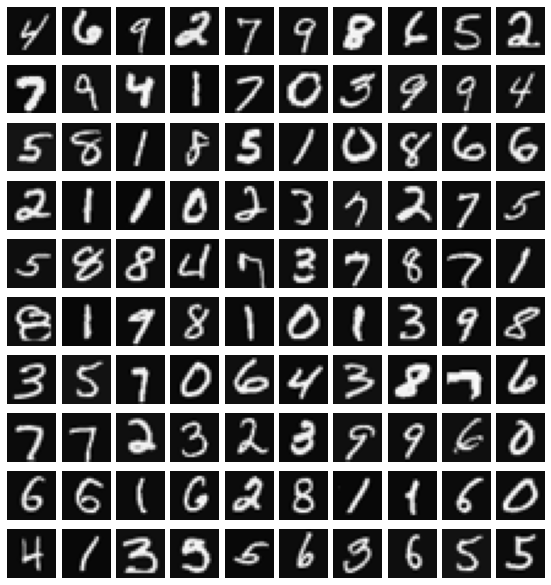

In [4]:
# randomly select 100 data points to display

index = np.random.choice(5000, 100)

# create a image data matrix for the 100 selected data points

img = np.zeros((10,10,20,20))
ind = np.arange(100)

for i in range(100):
    row, col = i // 10, i % 10
    img[row, col, :, :] = X[index[i],:].reshape(20,20, order='F')

# data visualization

fig, axs = plt.subplots(10, 10)

for i in range(10):
    for j in range(10):
        # axs[i, j].imshow(img[i,j,:,:])
        axs[i, j].imshow(img[i,j,:,:], cmap='gray')
        axs[i, j].axis('off')
        fig.subplots_adjust(wspace = -0.9)
        fig.set_size_inches(18.5, 10.5)

## Predict

In [5]:
# load the weights into variables Theta1 and Theta2

weight = scipy.io.loadmat('ex3weights.mat')

Theta1 = weight['Theta1']
Theta2 = weight['Theta2']

# add one column with 1's to X 

col_ones = np.ones(len(X)).reshape(-1,1)
X_with_ones = np.concatenate((col_ones, X), axis=1)

# sigmoid function

def sigmoid(z):
    return 1/(1 + np.exp(-z))

# predict function

a2 = sigmoid(np.dot(X_with_ones, np.transpose(Theta1)))
a2_with_ones = np.concatenate((col_ones, a2), axis=1)
a3 = sigmoid(np.dot(a2_with_ones, np.transpose(Theta2)))

def predict(ind):
    result = np.argmax(a3[ind], axis=0)+1
    probability = max(a3[ind]).round(3)
    if result == 10:
        return [0, probability]
    else:
        return [result, probability]

Neural Network Prediction: 3, with the probability 99.5%


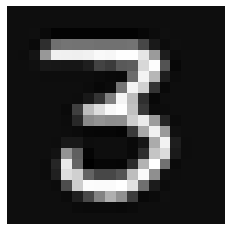

In [6]:
# Run through the examples one at a time to see what is predicting.

rp = np.random.choice(5000)

img = X[rp,:].reshape(20,20, order='F')
plt.imshow(img, cmap='gray')
plt.axis('off')

print(f'Neural Network Prediction: {predict(rp)[0]}, with the probability {100*predict(rp)[1]}%')

## Calculate weights using TensorFlow

The above exercise utilized pre-trained initial weights for the neural network, here we calculate them using TensorFlow. The training was performed using a Nvidia RTX 2070 super graphic card.

In [7]:
# import necessary libraries

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # compress error messages

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Check if the value has been normalized (-1 -- 1 instead of 0--255)

print(X.max())
print(X.min())

1.127688299158888
-0.13196323019852488


In [9]:
# Build sequential model

model = keras.Sequential()

# input size 401 including +1 bias
model.add(keras.Input(shape=401))

# add one hidden layer. Use sigmoid as activation function, not relu!
model.add(layers.Dense(25,activation='sigmoid', name='hidden_layer'))# model.add(layers.Dense(25,activation='relu',name='hidden_layer'))

# output
model.add(layers.Dense(10))

In [10]:
# Print model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 25)                10050     
                                                                 
 dense (Dense)               (None, 10)                260       
                                                                 
Total params: 10,310
Trainable params: 10,310
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Check feature shape

model_check_all = keras.Model(inputs=model.inputs, outputs=[layer.output for layer in model.layers])
features = model_check_all.predict(X_with_ones)
for feature in features:
    print(feature.shape)

(5000, 25)
(5000, 10)


In [12]:
# Compile model

model.compile(

    # use SparseCategoricalCrossentropy loss function
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    
    # use Adam optimizer, sgd converges too slow
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'],
)

In [13]:
# In the exercise, a "0" digit is labeled as "10" to make things compatible with Octave/MATLAB indexing as there is no zero index. We must change it back!

y = data['y']
new_y = np.where(y == 10, 0, y)

In [14]:
# Model training

model.fit(X_with_ones, new_y, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
157/157 - 1s - loss: 1.9132 - accuracy: 0.5668 - 663ms/epoch - 4ms/step
Epoch 2/50
157/157 - 0s - loss: 1.3310 - accuracy: 0.7862 - 289ms/epoch - 2ms/step
Epoch 3/50
157/157 - 0s - loss: 0.9865 - accuracy: 0.8394 - 291ms/epoch - 2ms/step
Epoch 4/50
157/157 - 0s - loss: 0.7717 - accuracy: 0.8656 - 291ms/epoch - 2ms/step
Epoch 5/50
157/157 - 0s - loss: 0.6348 - accuracy: 0.8820 - 297ms/epoch - 2ms/step
Epoch 6/50
157/157 - 0s - loss: 0.5422 - accuracy: 0.8916 - 288ms/epoch - 2ms/step
Epoch 7/50
157/157 - 0s - loss: 0.4770 - accuracy: 0.9022 - 295ms/epoch - 2ms/step
Epoch 8/50
157/157 - 0s - loss: 0.4289 - accuracy: 0.9098 - 312ms/epoch - 2ms/step
Epoch 9/50
157/157 - 0s - loss: 0.3911 - accuracy: 0.9144 - 327ms/epoch - 2ms/step
Epoch 10/50
157/157 - 0s - loss: 0.3625 - accuracy: 0.9182 - 383ms/epoch - 2ms/step
Epoch 11/50
157/157 - 0s - loss: 0.3378 - accuracy: 0.9230 - 436ms/epoch - 3ms/step
Epoch 12/50
157/157 - 0s - loss: 0.3183 - accuracy: 0.9260 - 315ms/epoch - 2ms/step
E

In [15]:
# Check the overall accuracy, might be a little bit overfitting

model.evaluate(X_with_ones, new_y, batch_size=32, verbose=2)

157/157 - 0s - loss: 0.1041 - accuracy: 0.9774 - 315ms/epoch - 2ms/step


[0.10406165570020676, 0.977400004863739]

In [16]:
# Get weights and biases

first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]

In [17]:
# Check weights dimensions

print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


In [18]:
# Now we obtain the weights

Theta1p = first_layer_weights.reshape(401, 25).T
Theta2p = second_layer_weights.reshape(25, 10).T
Theta2p = np.concatenate((second_layer_biases.reshape(-1,1), Theta2p), axis=1)

In [19]:
# Feedforward neural network

a2p = sigmoid(np.dot(X_with_ones, np.transpose(Theta1p)))
a2p_with_ones = np.concatenate((col_ones, a2p), axis=1)
a3p = sigmoid(np.dot(a2p_with_ones, np.transpose(Theta2p)))

def predict2(ind):
    result = np.argmax(a3p[ind], axis=0) # no +1 term as indexing has been corrected
    probability = max(a3p[ind]).round(3)
    return [result, probability] # no if statement here

Neural Network Prediction: 3, with the probability 99.8%


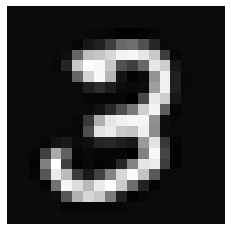

In [24]:
# Run through the examples one at a time to see what is predicting.

rp = np.random.choice(5000)

img = X[rp,:].reshape(20,20, order='F')
plt.imshow(img, cmap='gray')
plt.axis('off')

print(f'Neural Network Prediction: {predict2(rp)[0]}, with the probability {100*predict2(rp)[1]}%')